# AI & Data Science Market Trends & Skill Stack Analysis (for Students!)

## Project Overview

This project conducts a comparative analysis of the global AI and Data Science job market, with a specific focus on opportunities for students and entry-level candidates. Rather than generating new forecasts, this analysis visualizes market trends embedded in the dataset to highlight the disparity between the general job market and the entry-level landscape.

## Data Sources, & Scope

The dataset originates from Kaggle, from Mann Raval (https://www.kaggle.com/datasets/mann14/global-ai-and-data-science-job-market-20202026)

Data Sources & Scope
The dataset contains global job listings posted online. The method of collection was not disclosed, and thus overrepresentation in terms of location or company type cannot be realistically determined. It contains data from the years 2020 up until the end of 2025. Each row corresponds to an individual job listing, and is temporally scoped by year.

Skills extracted from each job listing refer to the "Required technical skill" needed by the job. The data preparation process strictly enforces quality by removing duplicate job identifiers and excluding any listings that contain NaN values. Several columns (like job titles, company type, and experience level) appear to be standardized or abstracted to fit the dataset structure.

The dataset cannot inform users about hiring outcomes, salary outcomes, skill acquisition difficulty, or causal relationships. The results should also only be interpreted as indicators of relative demand nature. Users who wish to utilize this project's results should only use it to support risk-aware upskilling decisions. Other interpretations should be handled with caution.

## Project Initialization & Data Preparation

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

plt.style.use("ggplot")
pd.set_option('display.max_columns', 50)

jobs = pd.read_csv('ai_jobs.csv')
skills = pd.read_csv('skills_demand.csv')

#  config
xlimmin = 0.95
xlimmax = 1.05

In [62]:
def clean_jobs(df):
    df = df.drop_duplicates(subset=["job_id"])
    df = df.dropna()
    return df

Function ```clean``` takes in a dataframe and drops duplicates and NaNs and is intended to clean the jobs dataframe.

### Data Execution & Touchup

In [63]:
j = clean_jobs(jobs)
s = skills.copy()

In [64]:
jobs_ids_norm = set(jobs["job_id"].astype(str).str.strip())
skills_ids_norm = set(skills["job_id"].astype(str).str.strip())

len(jobs_ids_norm & skills_ids_norm)

2050

In [65]:
j['Job_ID'] = j['job_id']
j['Job_Title'] = j['job_title']
j['Company_Type'] = j['company_type']
j['Industry'] = j['industry']
j['Country'] = j['country']
j['City'] = j['city']
j['Remote_Type'] = j['remote_type']
j['Experience_Level'] = j['experience_level']
j['Min_Experience_Years'] = j['min_experience_years']
j['Salary_Min_USD'] = j['salary_min_usd']
j['Salary_Max_USD'] = j['salary_max_usd']
j['Employment_Type'] = j['employment_type']
j['Posted_Year'] = j['posted_year']
j['Company_Size'] = j['company_size']


j['Average_Salary_USD'] = (j['Salary_Min_USD'] + j['Salary_Max_USD']) / 2
j['Average_Salary_USD'] = j['Average_Salary_USD'] / 1000

j = j[['Job_ID','Job_Title', 'Company_Type', 'Industry', 'Country', 'City',
       'Remote_Type', 'Experience_Level', 'Average_Salary_USD', 'Min_Experience_Years',
       'Salary_Min_USD', 'Salary_Max_USD', 'Employment_Type', 'Posted_Year',
       'Company_Size']]
j.head(1)

,Job_ID,Job_Title,Company_Type,Industry,Country,City,Remote_Type,Experience_Level,Average_Salary_USD,Min_Experience_Years,Salary_Min_USD,Salary_Max_USD,Employment_Type,Posted_Year,Company_Size
0,0IFD0TVBDIVU,MLOps Engineer,Research Lab,Education,Australia,Remote,Remote,Entry,64.548,0,56873,72223,Full-time,2023,Large


In [66]:
s['Skill'] = s['skill']
s['Skill_Category'] = s['skill_category']
s['Skill_Level'] = s['skill_level']
s['Job_ID'] = s['job_id']

s = s[['Job_ID', 'Skill', 'Skill_Category', 'Skill_Level']]
s.head(1)

,Job_ID,Skill,Skill_Category,Skill_Level
0,E0IFD0TVBDIV,R,Programming,Advanced


In [67]:
yoe0 = j[j['Min_Experience_Years'] == 0].copy()
yoe0.head(1)

,Job_ID,Job_Title,Company_Type,Industry,Country,City,Remote_Type,Experience_Level,Average_Salary_USD,Min_Experience_Years,Salary_Min_USD,Salary_Max_USD,Employment_Type,Posted_Year,Company_Size
0,0IFD0TVBDIVU,MLOps Engineer,Research Lab,Education,Australia,Remote,Remote,Entry,64.548,0,56873,72223,Full-time,2023,Large


As the project is aimed to inform students/0YOE individuals, a 0YOE only dataset is also made for another level of analysis.

## Market Overview

In [68]:
def marketoverview(df):
    jobs = df.drop_duplicates("Job_ID")
    jobs_per_year = (
        df[["Job_ID", "Posted_Year"]]
        .drop_duplicates()
        .groupby("Posted_Year").size()
    )

    job_title_counts = (
        jobs["Job_Title"]
        .value_counts()
        .head(100)
    )

    company_type_counts = (
        jobs["Company_Type"]
        .value_counts()
    )

    industry_counts = (
        jobs["Industry"]
        .value_counts()
        .head(10)
    )

    remote_counts = df.drop_duplicates("Job_ID")["Remote_Type"].value_counts()

    country_counts = (
        jobs["Country"]
        .value_counts()
        .head(10))
    
    avg_salary_per_year = (
        df[["Job_ID", "Posted_Year", "Average_Salary_USD"]]
        .drop_duplicates()
        .groupby("Posted_Year")["Average_Salary_USD"]
        .mean()
    )

    avg_salary_per_title = (
        jobs[["Job_Title", "Average_Salary_USD"]]
        .groupby("Job_Title")["Average_Salary_USD"]
        .mean()
        .sort_values(ascending=False)
    )

    def graph(jpy, jtc, ctc, ic, rc, cc, aspy, aspt):
    
        fig, axes = plt.subplots(4, 2, figsize=(14, 11))
        axes = axes.flatten()
        plt.tight_layout(pad=5)

        axes[0].plot(jpy.index[::-1], 
                     jpy.values[::-1])
        axes[0].set_xlabel("Year")
        axes[0].set_ylabel("Number of Jobs")
        axes[0].set_title("Job Postings Over Time")

        pos = axes[1].get_position()
        axes[1].set_position([pos.x0 + 0.1, pos.y0, pos.width - 0.1, pos.height])
        axes[1].barh(jtc.index[::-1], 
                     jtc.values[::-1])
        axes[1].set_xlabel("Number of Jobs")
        axes[1].set_title("Top Job Titles")
        axes[1].set_xlim(jtc.min() * xlimmin, jtc.max() * xlimmax)

        axes[2].barh(ctc.index[::-1], 
                     ctc.values[::-1])
        axes[2].set_xlabel("Number of Jobs")
        axes[2].set_title("Top Company Types")
        axes[2].set_xlim(ctc.min() * xlimmin, ctc.max() * xlimmax)

        axes[3].barh(ic.index[::-1], 
                     ic.values[::-1])
        axes[3].set_xlabel("Number of Jobs")
        axes[3].set_title("Top Industries")
        axes[3].set_xlim(ic.min() * xlimmin, ic.max() * xlimmax)

        axes[4].barh(rc.index[::-1], 
                     rc.values[::-1])
        axes[4].set_xlabel("Number of Jobs")
        axes[4].set_title("Top Modes of Work")
        axes[4].set_xlim(rc.min() * xlimmin, rc.max() * xlimmax)

        axes[5].barh(cc.index[::-1], 
                     cc.values[::-1])
        axes[5].set_xlabel("Number of Jobs")
        axes[5].set_title("Top Countries")
        axes[5].set_xlim(cc.min() * xlimmin, cc.max() * xlimmax)

        axes[6].plot(aspy.index, 
                     aspy.values)
        axes[6].set_xlabel("Average Salary (Thousand USD)")
        axes[6].set_title("Average Salary Per Year")

        pos = axes[7].get_position()
        axes[7].set_position([pos.x0 + 0.1, pos.y0, pos.width - 0.1, pos.height])
        axes[7].barh(aspt.index[::-1], 
                     aspt.values[::-1])
        axes[7].set_xlabel("Average Salary (Thousand USD)")
        axes[7].set_title("Average Salary Per Job Title")
        axes[7].set_xlim(aspt.min() * xlimmin, aspt.max() * xlimmax)
        
    return graph(jobs_per_year, job_title_counts, company_type_counts, industry_counts, 
                 remote_counts, country_counts, avg_salary_per_year, avg_salary_per_title)



    

### Complete Job Pool Overview

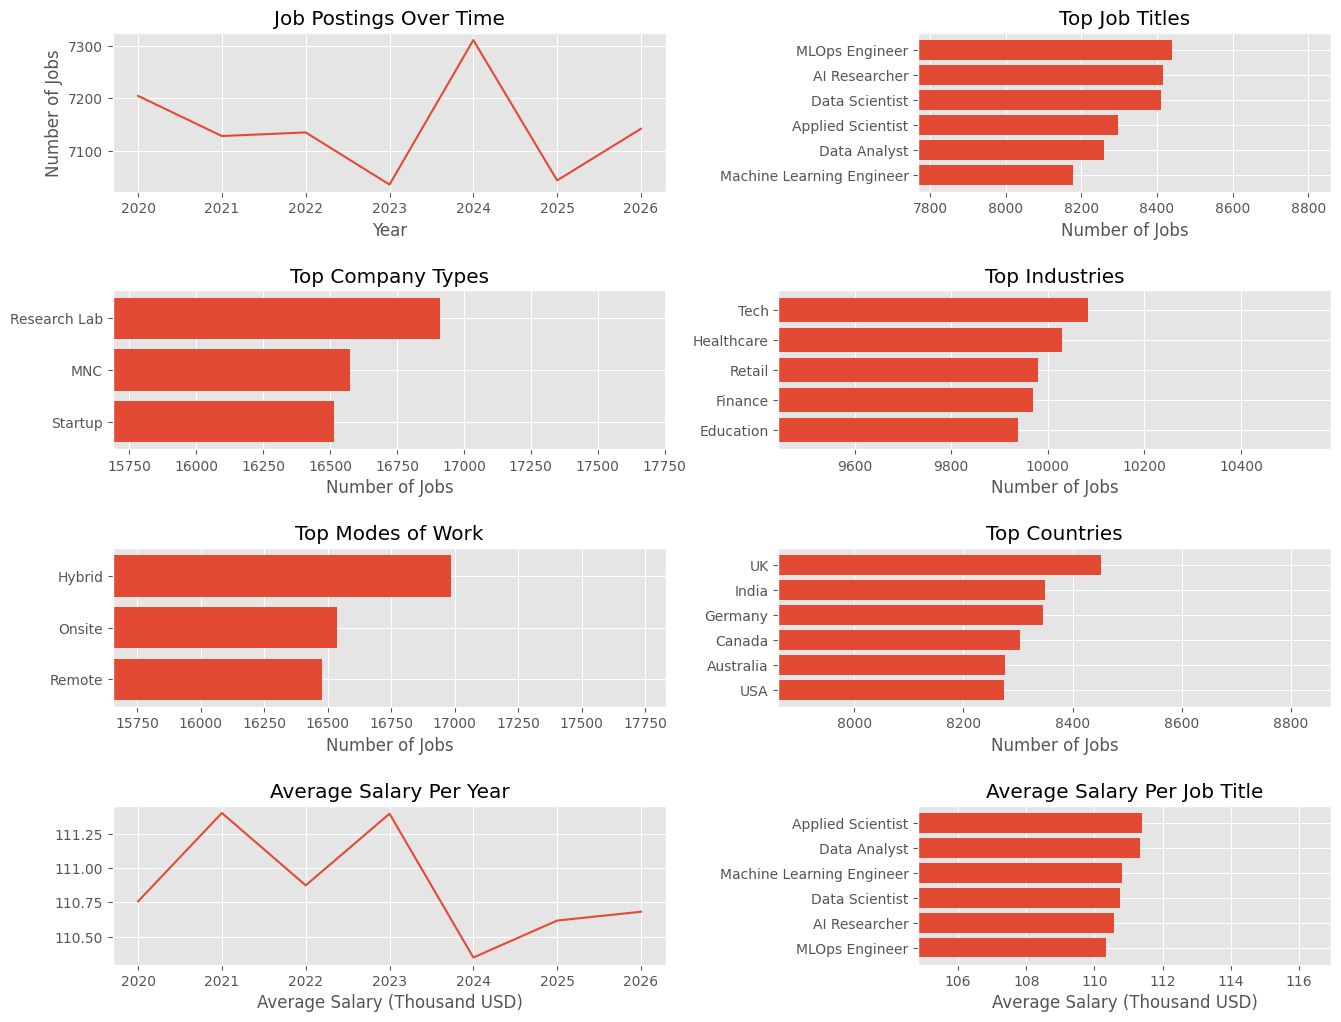

In [69]:
marketoverview(j)

**Key Takeaways** 

Hiring demand for AI and Data Science roles remains broadly stable over time. Recent data shows a temporary dip followed by a recovery. This pattern does not necessarily reflect a decline in the field, but is more representative of cyclical hiring patterns instead.

MLOps Engineer appears the most frequently, indicating the demand for operational and deployment capabilities in ML. 

AI Scientist, Data Scientist roles remain close behind, suggesting the importance of modeling and research work along with operations and deployment work.

Machine Learning Engineer as a title appears less frequently in the data. This doesn't imply lower demand for "ML engineering work", as ML adjacent or ML-using roles in the data are still high. Rather, it more likely reflects the role consolidation of ML work into other titles.

Average Salary based on title remains close relative to one another. From the data, the compensation doesn't seem to be purely driven by title. Seniority, although was not measured, could be a better determinant of salary on top of title.

Hybrid work remains the dominant modality for most jobs, with the demand spanning multiple industries quite closely. This suggests that AI and Data Science roles are now becoming normalized and adapted across sectors.


POST-CREATION NOTE: WOW this was so insightful for me. I learned how to think bigger and I've reinforced my tendency of thinking safer. I have started learned and applying now the skill of counterfactual thinking which was hard but SO REWARDING.

### 0 Years of Exerience Job Pool Overview

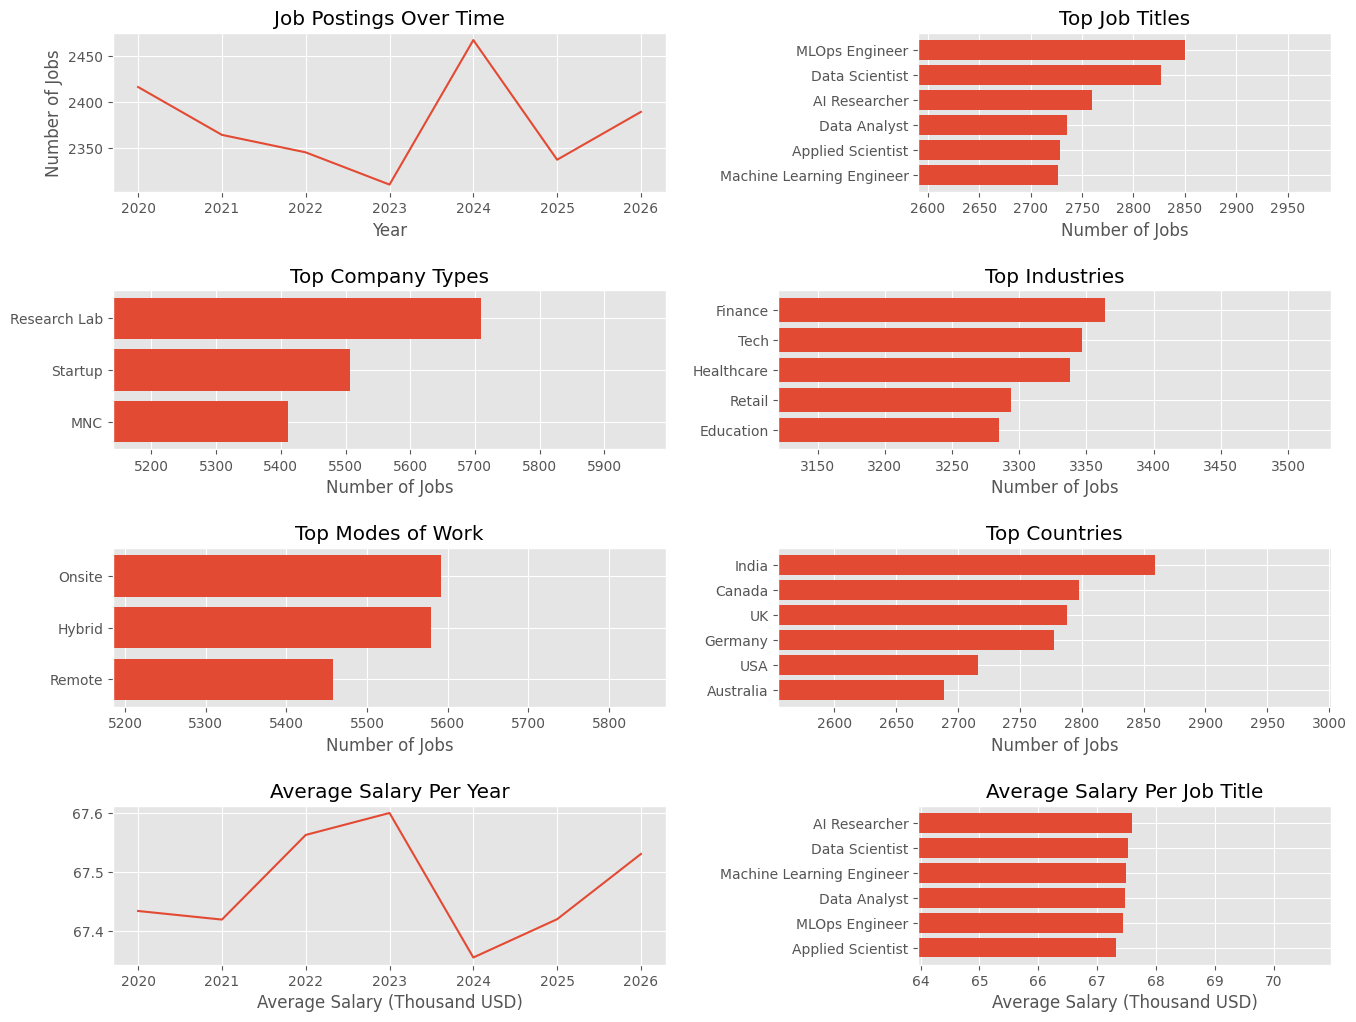

In [70]:
marketoverview(yoe0)

**Key Takeaways** 

Hiring demand for AI and Data Science roles remains broadly stable over time. Recent data shows a temporary dip followed by a recovery, similar to trends for the overall job market. This pattern does not necessarily reflect a decline in the field, but is more representative of cyclical hiring patterns instead.

MLOps Engineer, followed by Data Scientist and AI Researcher appears the most frequently, suggesting the demand for full-stack AI, ML, and Data development (which the three roles fulfill well), in the field for fresh hires. 

Data Analyst as an entry role presents as slightly lower. Although Data Analysis is likely the work on par with the skill level of an individual with 0 YOE, Data Analytics is also getting increasingly automated by AI.

Applied Scientist presents as the second lowest title. This points less likely to a decline in demand, but rather the high technical expertise or domain knowledge needed for the role.

Average Salary based on title remains close relative to one another. From the data, all titles are similarly compensated, which could be better described by the entry-level nature of the listing rather than the nature of the role or the title.

Onsite work leads, with hybrid work trailing closely. This could reflect the preference of companies to train new-entrants onsite, or the lower-level nature of work newly-hires go through as part of being new.


## Skill Analysis

### Top Skills Analysis

In [71]:
def skills_more(jobs_df, skills_df):
    df = skills_df.merge(
    jobs_df[
        ['Job_ID', 'Posted_Year', 'Job_Title', 'Company_Type',
         'Industry', 'Country', 'Remote_Type', 'Experience_Level', 'Min_Experience_Years']
    ],
    on='Job_ID',
    how='left'
)
    df.dropna(inplace=True)
    return df

Function ```skills_more``` takes in two dataframes, first for jobs and next for skills, then does the following: 1) Merges them by job id 2) drops NaNs for the additions. This function unifies the two dataframes for data analysis.

In [72]:
sm = skills_more(j, s)
sm_yoe0 = sm[sm['Min_Experience_Years'] == 0].copy()

In [73]:
def skills_top(df):
    skills = df

    top_skills = (
        skills["Skill"]
        .value_counts()
        .head(10)
    )

    top_skill_categories = (
        skills["Skill_Category"]
        .value_counts()
        .head(10)
    )

    top_skill_levels = (
        skills["Skill_Level"]
        .value_counts()
        .head(10)
    )


    def graph(ts, tsc, tsl):
    
        fig, axes = plt.subplots(1, 3, figsize=(14, 4))
        axes = axes.flatten()
        plt.tight_layout(pad=5)

        pos = axes[0].get_position()
        axes[0].barh(ts.index[::-1], 
                     ts.values[::-1])
        axes[0].set_xlabel("Number of Jobs")
        axes[0].set_title("Top Skills")
        axes[0].set_xlim(ts.min() * xlimmin, ts.max() * xlimmax)

        axes[1].barh(tsc.index[::-1], 
                     tsc.values[::-1])
        axes[1].set_xlabel("Number of Jobs")
        axes[1].set_title("Top Skill Categories")
        axes[1].set_xlim(tsc.min() * xlimmin, tsc.max() * xlimmax)

        axes[2].barh(tsl.index[::-1], 
                     tsl.values[::-1])
        axes[2].set_xlabel("Number of Jobs")
        axes[2].set_title("Top Skill Levels")
        axes[2].set_xlim(tsl.min() * xlimmin, tsl.max() * xlimmax)

        
    return graph(top_skills, top_skill_categories, top_skill_levels)



    

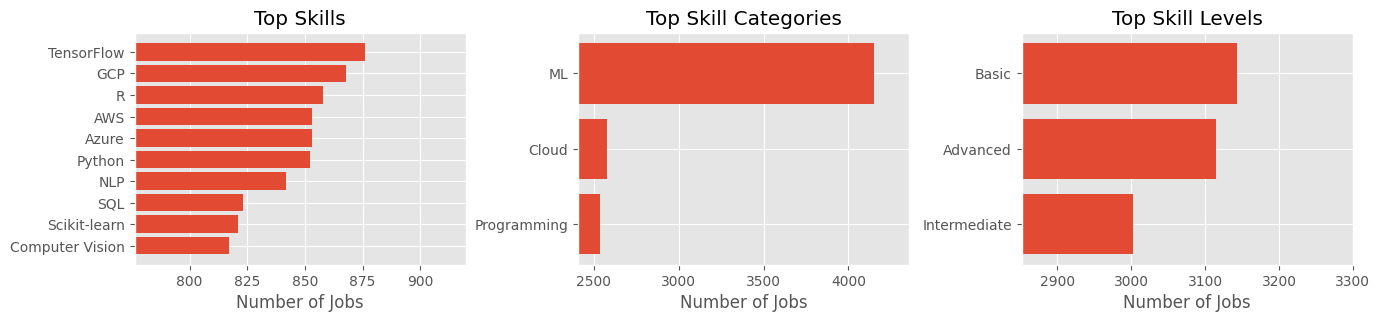

In [74]:
skills_top(sm)

**Key Takeaways** 

The overall job market concentrates demand on end-to-end ML stacks through TensorFlow and a combination of cloud platforms. Core programming tools also appear similarly frequently. 

Categorically, ML skills top the charts, with cloud and programming capabilities appearing as supplemetary capabilities rather than standalone requirements. 

The prevalence of Basic and Advanced skills over Intermediate suggests that employers seek foundational skills and deep specialization over intermediate prodiciency alone.

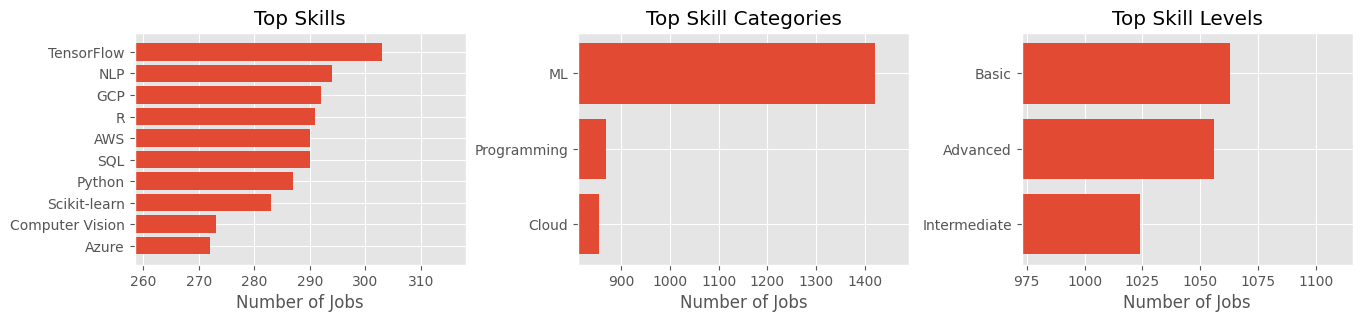

In [75]:
skills_top(sm_yoe0)

**Key Takeaways** 

For entry-level roles, demand still focuses on core ML and supplementary tools. Surprisingly, TensorFlow, NLP, and scikit-learn appear prominently despite the entry-level nature of the position.

ML skills still remain as top skill categories expected of new-hires. This suggests the expectation for early exposure with ML rather than just of analytical, reporting, and supplementary skills.

Basic and Advanced skills prevailing over Intermediate skills suggests that employers expect either solid fundamentals or demonstrable depth in the field over surface-level proficiency across the stack.

### Skill Co-occurrence Analysis

In [76]:
def combine_skills(df):
    df = df[df["Skill"].notna() & (df["Skill"].str.len() > 0)]
    df = df.sort_values('Job_ID').groupby('Job_ID', as_index=False).agg(list)
    return df

Function ```combine_skills``` takes in a dataframe and groups by the job id and combines their features into a list. It also cleans the skills df by dropping skills with NaN values or 0 length string values (listings with NaNs or no skill listings). Initially, a singular job with 3 skills splits that 3 skills (and 3 skill categories and 3 skill levels) into 3 rows with the same job id. This function makes the skills and its categories and levels more managable (and actually work for co-occurence).

In [77]:
s_new = combine_skills(s)
s_new = skills_more(j, s_new)
s_new_yoe0 = s_new[s_new['Min_Experience_Years'] == 0].copy()

In [78]:
mlb = MultiLabelBinarizer()

skill_matrix = pd.DataFrame(
    mlb.fit_transform(s_new['Skill']),
    columns=mlb.classes_,
    index=s_new['Job_ID']
)

cooccurrence = skill_matrix.T @ skill_matrix

np.fill_diagonal(cooccurrence.values, 0)

pairs = (
    cooccurrence
    .stack()
    .reset_index()
)

pairs.columns = ['skill_1', 'skill_2', 'count']

pairs = pairs[pairs['count'] > 0]
pairs = pairs[pairs['skill_1'] < pairs['skill_2']]

pairs.sort_values('count', ascending=False).head(10)

,skill_1,skill_2,count
43,GCP,TensorFlow,350
87,R,TensorFlow,350
54,NLP,TensorFlow,344
76,Python,TensorFlow,343
3,AWS,GCP,340
21,Azure,TensorFlow,339
17,Azure,Python,338
10,AWS,TensorFlow,336
6,AWS,Python,335
37,GCP,NLP,335


**Key Takeaways & Interpretation**

The most frequent skill pairs for the overall market consistently link TensorFlow with cloud platforms (GCP, AWS, Azure) and core programming tools (Python, R), indicating that ML frameworks are expected to operate within cloud-based, production environments. The prominence of cloud–cloud (AWS–GCP) and cloud–ML pairings suggests that deep infrastructure familiarity is a first-class requirement, not just an optional add-on to modeling skills. Overall, the co-occurrence structure implies that employers value integrated ML stacks, where model development, data handling, and deployment are closely coupled.

In [79]:
mlb = MultiLabelBinarizer()

skill_matrix = pd.DataFrame(
    mlb.fit_transform(s_new_yoe0['Skill']),
    columns=mlb.classes_,
    index=s_new_yoe0['Job_ID']
)

cooccurrence = skill_matrix.T @ skill_matrix

np.fill_diagonal(cooccurrence.values, 0)

pairs = (
    cooccurrence
    .stack()
    .reset_index()
)

pairs.columns = ['skill_1', 'skill_2', 'count']

pairs = pairs[pairs['count'] > 0]
pairs = pairs[pairs['skill_1'] < pairs['skill_2']]

pairs.sort_values('count', ascending=False).head(10)

,skill_1,skill_2,count
87,R,TensorFlow,124
6,AWS,Python,121
21,Azure,TensorFlow,119
54,NLP,TensorFlow,119
109,Scikit-learn,TensorFlow,119
76,Python,TensorFlow,118
75,Python,Scikit-learn,117
97,SQL,Scikit-learn,116
38,GCP,PyTorch,115
43,GCP,TensorFlow,114


**Key Takeaways & Interpretation**

For new-hires, the mosst frequent skill pairs consistently combine core ML frameworks with programming languages or cloud platforms (AWS, GCP, Azure). This pattern indicates that ML tooling is rarely requested in isolation and is instead expected to be used within an applied, production-oriented stack, possibly reflecting the relatively high skill stack requirement of the field. The repeated co-occurrence of TensorFlow with both modeling and infrastructure skills suggests that framework proficiency is valued most when paired with implementation and deployment capability